In [0]:
import csv
import sys
import math as m
import time
import networkx as nx
import matplotlib.pyplot as plt

Do you want to have the drawn graph view?(Y/N)
y


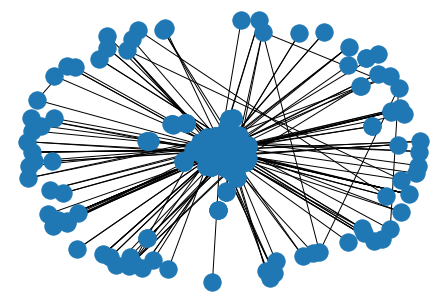

In [0]:
tic = time.perf_counter()
degreelist=[]
closenesslist=[]
betweennesslist=[]
pagernklist=[]
da = open('airportcorona2.csv',"r")     # we are opening the dataset as da
data = csv.reader(open('airportcorona2.csv',"r"))
Graphtype=nx.Graph()
G = nx.parse_edgelist(da, comments='t',delimiter=',', create_using=Graphtype, nodetype=str, data=(('weight', int),))  # G is the graph object of networkx created based on the datas
print("Do you want to have the drawn graph view?(Y/N)")
ch1=input()
if(ch1=='Y' or ch1=='y'):
    nx.draw(G)   #we are drawing the graph
    plt.show()


Degree Centrality calculated

In [0]:
#degreecentrality
deg=nx.degree_centrality(G)
sorted_deg = sorted(deg.items() , reverse=True, key=lambda x: x[1])
degreelist=[x[0] for x in sorted_deg]
print("degreecentrality done")
toc = time.perf_counter()
print(f"Elapsed time {(toc - tic)/60:0.4f} minutes")

degreecentrality done
Elapsed time 0.2051 minutes


Closeness Centrality Calculated

In [0]:
#closeness
close=nx.closeness_centrality(G)
sorted_close = sorted(close.items() , reverse=True, key=lambda x: x[1])
closenesslist=[x[0] for x in sorted_close]
print("closeness done")
toc = time.perf_counter()
print(f"Elapsed time {(toc - tic)/60:0.4f} minutes")

closeness done
Elapsed time 3.1498 minutes


Betweeness Centrality Calculated

In [0]:
#betweeness
between=nx.betweenness_centrality(G)
sorted_between = sorted(between.items() , reverse=True, key=lambda x: x[1])
betweennesslist=[x[0] for x in sorted_between]
print("betweeness done")
toc = time.perf_counter()
print(f"Elapsed time {(toc - tic)/60:0.4f} minutes")

betweeness done
Elapsed time 2.0075 minutes


Page Rank Calculated

In [0]:
#pagerank
pagernk=nx.pagerank(G)
sorted_pagernk = sorted(pagernk.items() , reverse=True, key=lambda x: x[1])
pagernklist=[x[0] for x in sorted_pagernk]
print("pagerank done")
toc = time.perf_counter()
print(f"Elapsed time {(toc - tic)/60:0.4f} minutes")

pagerank done
Elapsed time 2.9062 minutes


Fuction to find the next set of nodes getting affected

In [0]:
def infulential_node_function(seed_node):
    influencial_node_list=[]
    temp=[]
    for i in seed_node:
        # print(i)
        for j in route:
            if(j[0]==i):
                # print(j)
                temp.append(j[1])
        influencial_node_list.extend(temp)
    influencial_node_list=list(set(influencial_node_list))
    return influencial_node_list

In [0]:
air=[]
route=[]

In [0]:
for row in data:
    air.append(row[0])
    route.append(row)

air=list(set(air))

print("Data Loaded")

Data Loaded



Press 1 -> Find percentage of nodes affected(in 1st and 2nd hop) for inputed number of affected nodes

Press 2 -> Find number of nodes need to be affected to reach a given Percentage in 1st and 2nd hop

Press 3 -> Find top n seed nodes

Press 4 -> Exit
3
Enter the value of 'n' for the loaded centrality 20
The top 20 seed nodes are ['PVG', 'SYD', 'ATL', 'YUL', 'IST', 'SVO', 'HKG', 'GRU', 'BOG', 'LAX', 'DFW', 'LHR', 'MEX', 'BNE', 'CAN', 'AMS', 'SFO', 'ORD', 'MIA', 'HND']

Press 1 -> Find percentage of nodes affected(in 1st and 2nd hop) for inputed number of affected nodes

Press 2 -> Find number of nodes need to be affected to reach a given Percentage in 1st and 2nd hop

Press 3 -> Find top n seed nodes

Press 4 -> Exit
1
Enter the number nodes affected nodes :50
545  nodes affected in 1st hop and i.e.  13.913709471534338 %
1588  nodes affected in 2nd hop and i.e.  40.54123053357161 %

Press 1 -> Find percentage of nodes affected(in 1st and 2nd hop) for inputed number of affected nodes


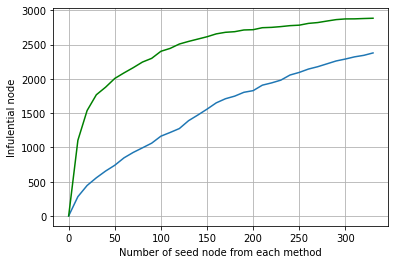


Press 1 -> Find percentage of nodes affected(in 1st and 2nd hop) for inputed number of affected nodes

Press 2 -> Find number of nodes need to be affected to reach a given Percentage in 1st and 2nd hop

Press 3 -> Find top n seed nodes

Press 4 -> Exit
4


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [0]:
while(1):
    print("\nPress 1 -> Find percentage of nodes affected(in 1st and 2nd hop) for inputed number of affected nodes")
    print("\nPress 2 -> Find number of nodes need to be affected to reach a given Percentage in 1st and 2nd hop")
    print("\nPress 3 -> Find top n seed nodes")
    print("\nPress 4 -> Exit")
    ch = int(input())
    if(ch==2):
        val = int(input("Enter the percentage you want to affect :"))
        c=0
        x=[]
        y=[]
        x_plot=[]
        y_plot=[]
        for s in range(0,800,10):
            #total seed nodes from above methods
            node=degreelist[:s]+closenesslist[:s]+betweennesslist[:s]+pagernklist[:s]
            #to find unique seed nodes
            unique_seed_node_list=list(set(node))
            #print(unique_seed_node_list)
            second_influencial_node_list=infulential_node_function(unique_seed_node_list)
            #print(second_influencial_node_list)
            third_influencial_node_list=infulential_node_function(second_influencial_node_list)
            str = "percetange at 1st hop:"
            str2 = "percetange at 2nd hop:"
            hop1 = ((len(second_influencial_node_list)/len(air))*100)
            hop2 = ((len(third_influencial_node_list)/len(air))*100)
            x.append(s)
            y.append(len(second_influencial_node_list))
            y_plot.append(len(third_influencial_node_list))
            if(hop2>=val and c==0):
                c=1
                print("For",s," affected nodes")
                print(str,hop1,"% reached")
                print(str2,hop2,"% reached")
            if(hop1>=val):
                print("For",s," affected nodes")
                print(str,hop1,"% reached")
                print(str2,hop2,"% reached")
                print("If want to see the curve of 1st and 2nd hop press Y else N")
                ch2 = input()
                if(ch2=='Y' or ch2=='y'):
                    plt.plot(x,y)
                    plt.plot(x,y_plot,color='green')
                    plt.xlabel('Number of seed node from each method')
                    plt.ylabel('Infulential node')
                    plt.grid()
                    plt.show()
                    break
                else:
                    break
                
    if(ch==1):
        val = int(input("Enter the number nodes affected nodes :"))
        s = val
        seed_node=degreelist[:s]+closenesslist[:s]+betweennesslist[:s]+pagernklist[:s]
        unique_seed_node_list=list(set(seed_node))
        unique_seed_node_list=unique_seed_node_list[:s]
        second_influencial_node_list=infulential_node_function(unique_seed_node_list)
        third_influencial_node_list=infulential_node_function(second_influencial_node_list)
        hop1 = ((len(second_influencial_node_list)/len(air))*100)
        hop2 = ((len(third_influencial_node_list)/len(air))*100)
        print(len(second_influencial_node_list)," nodes affected in 1st hop and i.e. ",hop1,"%")
        print(len(third_influencial_node_list)," nodes affected in 2nd hop and i.e. ",hop2,"%")

    if(ch==3):
      s = int(input("Enter the value of 'n' for the loaded centrality "))
      seed_node=degreelist[:s]+closenesslist[:s]+betweennesslist[:s]+pagernklist[:s]
      unique_seed_node_list=list(set(seed_node))
      print("The top",s,"seed nodes are",unique_seed_node_list[:s])

    if(ch==4):
        sys.exit(0)